In [64]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=FutureWarning)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### step-1 Preview of data

In [3]:
data=pd.read_csv("train.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# dropping the column item_identifier
data.drop("Item_Identifier",axis=1,inplace=True)

In [5]:
data.shape

(8523, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [7]:
data.describe(include='all')

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [8]:
data.isna().sum()/data.shape[0]

Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [9]:
# taking null value columns 
null_cols=[features for features in data.columns if data[features].isna().sum()>0]

In [10]:
# taking numerical columns
num_cols=data.select_dtypes(include=[np.number]).columns

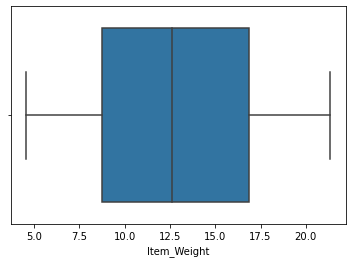

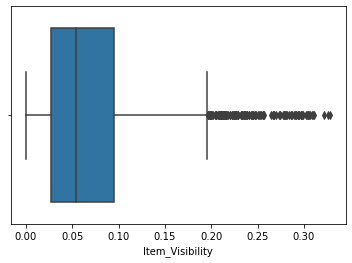

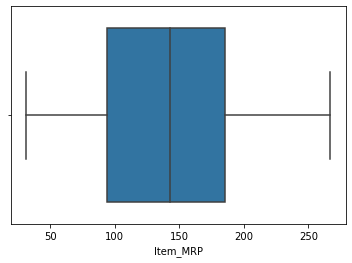

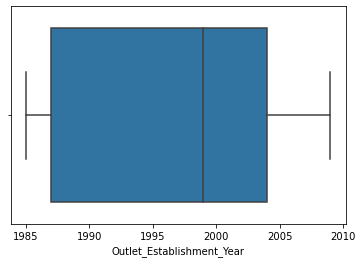

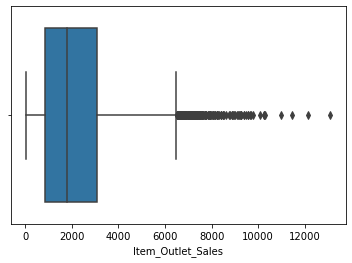

In [11]:
# boxplot
for features in num_cols:
    sns.boxplot(features,data=data)
    plt.show()

### Missing value treatment

In [12]:
null_cols

['Item_Weight', 'Outlet_Size']

In [13]:
data.Item_Weight.isna().sum()

1463

In [14]:
data.Item_Weight.value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [15]:
data.Item_Weight.nunique()

415

In [16]:
# median imputation
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].median())

In [17]:
data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [19]:
data.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Plotting the graph

In [21]:
# NUMERICAL COLUMNS
# -Continuos
# -Discrete
continous_cols=[]
discrete_cols=[]
for features in num_cols:
    if data[features].nunique()>=20:
        continous_cols.append(features)
    else:
        discrete_cols.append(features)
print(f"continuous cols are {continous_cols}\ndiscrete cols are {discrete_cols}")            


continuous cols are ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
discrete cols are ['Outlet_Establishment_Year']


In [22]:
data['Outlet_Establishment_Year'].nunique()

9

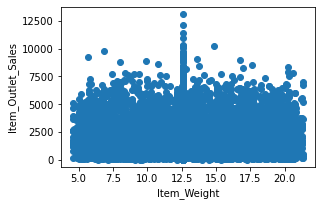

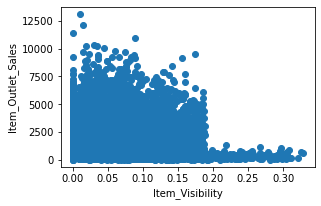

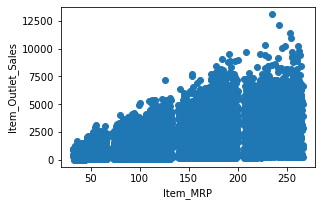

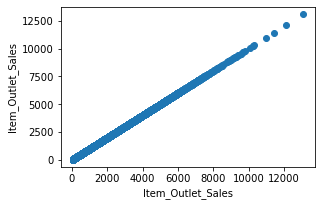

In [23]:
j=1
for features in continous_cols:
    plt.figure(figsize=(10,10))

    plt.subplot(3,2,j+1)
    plt.scatter(data[features],data['Item_Outlet_Sales'])
    plt.xlabel(features)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()
    j+=1

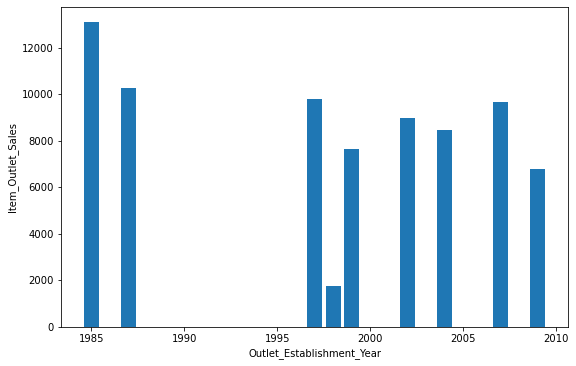

In [24]:
j=0
for features in discrete_cols:
    plt.figure(figsize=(20,20))

    plt.subplot(3,2,j+1)
    plt.bar(data[features],data['Item_Outlet_Sales'])
    plt.xlabel(features)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()
    j=+1

In [25]:
# object cols
object_cols=(data.select_dtypes('object').dtypes).index
object_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [26]:
obs_val=data.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].mean()

In [27]:
obs_val_df=pd.DataFrame(obs_val).reset_index()
obs_val_df

,Item_Fat_Content,Item_Outlet_Sales
0,LF,2073.551928
1,Low Fat,2164.477336
2,Regular,2235.186702
3,low fat,2087.740737
4,reg,1962.192268


<BarContainer object of 5 artists>

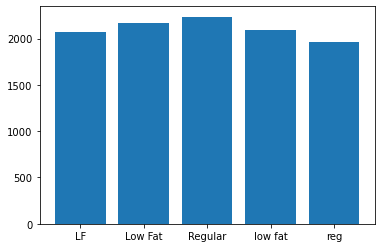

In [28]:
plt.bar(obs_val_df['Item_Fat_Content'],obs_val_df['Item_Outlet_Sales'])

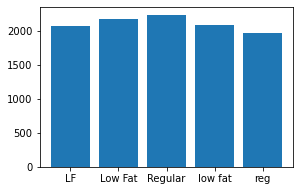

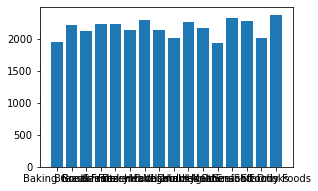

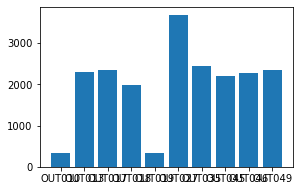

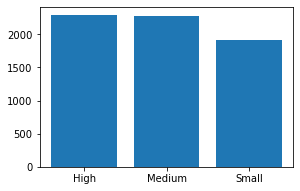

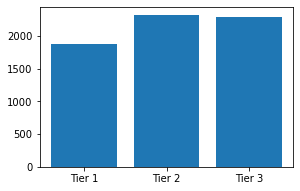

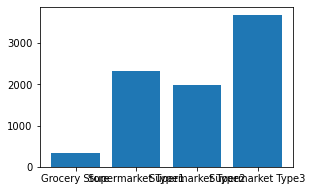

In [29]:
j=0
for features in object_cols:
    plt.figure(figsize=(10,10))
    plt.subplot(3,2,j+1)
    obs_val=data.groupby([features])['Item_Outlet_Sales'].mean()
    obs_val_df=pd.DataFrame(obs_val).reset_index()
    plt.bar(obs_val_df[features],obs_val_df['Item_Outlet_Sales'])
    plt.show()
    j=j+1

### Outlier treatment

In [30]:
# outlier treatment using standard deviation
for features in continous_cols:
    up_limit=data[features].mean() + (data[features].std())*3
    low_limit=data[features].mean() - (data[features].std())*3

    data.loc[data[features]>up_limit,features]=up_limit
    data.loc[data[features]<low_limit,features]=low_limit

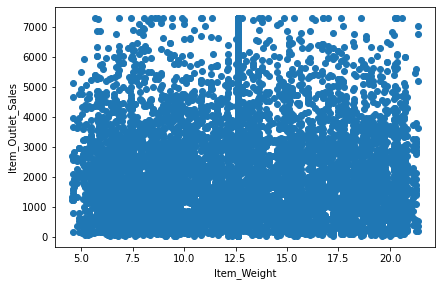

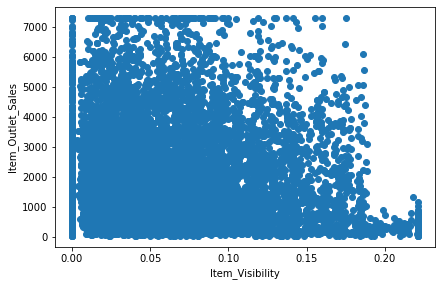

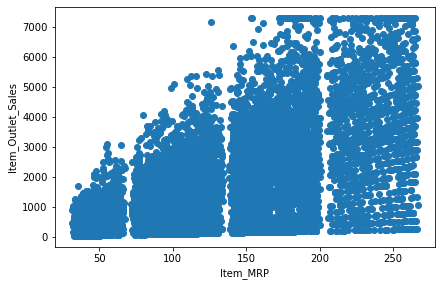

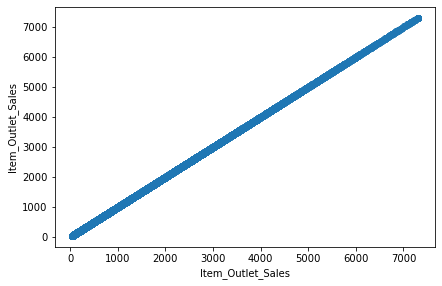

In [31]:
j=1
for features in continous_cols:
    plt.figure(figsize=(15,15))

    plt.subplot(3,2,j+1)
    plt.scatter(data[features],data['Item_Outlet_Sales'])
    plt.xlabel(features)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()
    j+=1

### Categorical Encoding

In [32]:
object_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [33]:
# LABEL ENCODING
from collections import defaultdict
defaultEncoder=defaultdict(LabelEncoder)

In [35]:
object_cols_df=data[object_cols]

In [36]:
object_cols_df_fit=object_cols_df.apply(lambda x: defaultEncoder[x.name].fit_transform(x))
object_cols_df_fit

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,4,9,1,0,1
1,2,14,3,1,2,2
2,1,10,9,1,0,1
3,2,6,0,1,2,0
4,1,9,1,0,2,1
...,...,...,...,...,...,...
8518,1,13,1,0,2,1
8519,2,0,7,1,1,1
8520,1,8,6,2,1,1
8521,2,13,3,1,2,2


In [37]:
data.drop(object_cols,axis=1,inplace=True)

In [38]:
DF=pd.concat([data,object_cols_df_fit],axis=1)

In [39]:
DF.shape

(8523, 11)

### Feature Selection(correlation)

In [40]:
corr_df=DF.corr()

In [41]:
cor_columns=abs(corr_df['Item_Outlet_Sales']).sort_values(ascending=False)

In [42]:
finalcols=cor_columns[cor_columns>0.1].index

In [43]:
finalcols

Index(['Item_Outlet_Sales', 'Item_MRP', 'Outlet_Type', 'Outlet_Identifier',
       'Item_Visibility'],
      dtype='object')

In [44]:
final_df=DF[finalcols]
final_df

,Item_Outlet_Sales,Item_MRP,Outlet_Type,Outlet_Identifier,Item_Visibility
0,3735.1380,249.8092,1,9,0.016047
1,443.4228,48.2692,2,3,0.019278
2,2097.2700,141.6180,1,9,0.016760
3,732.3800,182.0950,0,0,0.000000
4,994.7052,53.8614,1,1,0.000000
...,...,...,...,...,...
8518,2778.3834,214.5218,1,1,0.056783
8519,549.2850,108.1570,1,7,0.046982
8520,1193.1136,85.1224,1,6,0.035186
8521,1845.5976,103.1332,2,3,0.145221


### Scaling down

In [45]:
df=final_df.drop('Item_Outlet_Sales',axis=1)

In [46]:
df

,Item_MRP,Outlet_Type,Outlet_Identifier,Item_Visibility
0,249.8092,1,9,0.016047
1,48.2692,2,3,0.019278
2,141.6180,1,9,0.016760
3,182.0950,0,0,0.000000
4,53.8614,1,1,0.000000
...,...,...,...,...
8518,214.5218,1,1,0.056783
8519,108.1570,1,7,0.046982
8520,85.1224,1,6,0.035186
8521,103.1332,2,3,0.145221


In [47]:
X=df

In [48]:
sc=StandardScaler()
sc.fit_transform(X)

array([[ 1.74745381, -0.25265831,  1.50781338, -0.99533614],
       [-1.48902325,  1.00297245, -0.60707075, -0.93051052],
       [ 0.01004021, -0.25265831,  1.50781338, -0.98103492],
       ...,
       [-0.89720755, -0.25265831,  0.45037131, -0.61132865],
       [-0.60797692,  1.00297245, -0.60707075,  1.59641945],
       [-1.05226104, -0.25265831,  1.15533269, -0.41686656]])

In [50]:
X=pd.DataFrame(sc.fit_transform(X))

In [52]:
X.columns=[df.columns]

In [53]:
X

,Item_MRP,Outlet_Type,Outlet_Identifier,Item_Visibility
0,1.747454,-0.252658,1.507813,-0.995336
1,-1.489023,1.002972,-0.607071,-0.930511
2,0.010040,-0.252658,1.507813,-0.981035
3,0.660050,-1.508289,-1.664513,-1.317312
4,-1.399220,-0.252658,-1.312032,-1.317312
...,...,...,...,...
8518,1.180783,-0.252658,-1.312032,-0.178000
8519,-0.527301,-0.252658,0.802852,-0.374649
8520,-0.897208,-0.252658,0.450371,-0.611329
8521,-0.607977,1.002972,-0.607071,1.596419


In [54]:
y=final_df['Item_Outlet_Sales']

In [55]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [58]:
X_train

,Item_MRP,Outlet_Type,Outlet_Identifier,Item_Visibility
1921,-0.390969,-1.508289,-1.664513,1.650265
655,-0.609583,-0.252658,1.155333,-1.030368
2229,-0.190485,2.258603,0.097891,-0.229420
2537,1.310650,-0.252658,0.802852,1.057128
3528,0.703916,-0.252658,-1.312032,0.531601
...,...,...,...,...
5734,-0.029050,-1.508289,-1.664513,3.115374
5191,-1.049049,-0.252658,-0.959551,1.041724
5390,1.547519,-0.252658,0.802852,-0.937223
860,-0.370092,-0.252658,-0.959551,-0.226570


In [59]:
y_train

1921     117.8466
655     1230.3984
2229    4933.5780
2537    1789.6704
3528    3872.9586
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 5966, dtype: float64

In [61]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [63]:
lr.score(X_train,y_train)

0.5025926446119854